<a href="https://colab.research.google.com/github/pravin-raut/MachineLearning/blob/Master/dissertation/ARIMA_Currency_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df_USD_EUR=pd.read_csv('/content/drive/MyDrive/dissertation/df_USD_EUR.csv')
df_USD_EUR['Date'] = pd.to_datetime(df_USD_EUR['Date'])

df_USD_EUR=df_USD_EUR.set_index('Date')
df_USD_EUR

,Original_USD_EUR_Price
Date,
2020-01-02,1.122083
2020-01-03,1.117144
2020-01-06,1.116196
2020-01-07,1.119799
2020-01-08,1.115474
...,...
2023-06-27,1.091048
2023-06-28,1.095722
2023-06-29,1.091584


In [5]:
df_USD_EUR['Original_USD_EUR_Price_Pct_Change']=df_USD_EUR['Original_USD_EUR_Price'].pct_change()
df_USD_EUR['Original_USD_EUR_Price_Pct_Change_diff']=df_USD_EUR['Original_USD_EUR_Price'].pct_change().diff()
df_USD_EUR

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff
Date,,,
2020-01-02,1.122083,NaN,NaN
2020-01-03,1.117144,-0.004401,NaN
2020-01-06,1.116196,-0.000848,0.003553
2020-01-07,1.119799,0.003228,0.004077
2020-01-08,1.115474,-0.003863,-0.007091
...,...,...,...
2023-06-27,1.091048,0.000349,0.005115
2023-06-28,1.095722,0.004284,0.003935
2023-06-29,1.091584,-0.003777,-0.008061


In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose


Text(0.5, 0.98, 'Multiplicative Decompose')

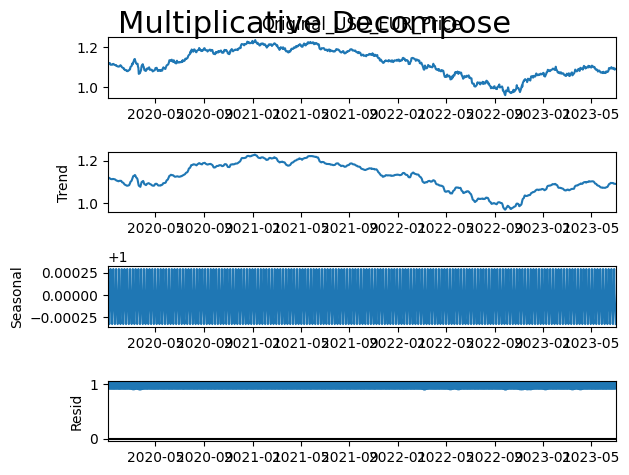

In [7]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(df_USD_EUR['Original_USD_EUR_Price'], model='multiplicative', extrapolate_trend='freq')
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)


Text(0.5, 0.98, 'Additive Decompose')

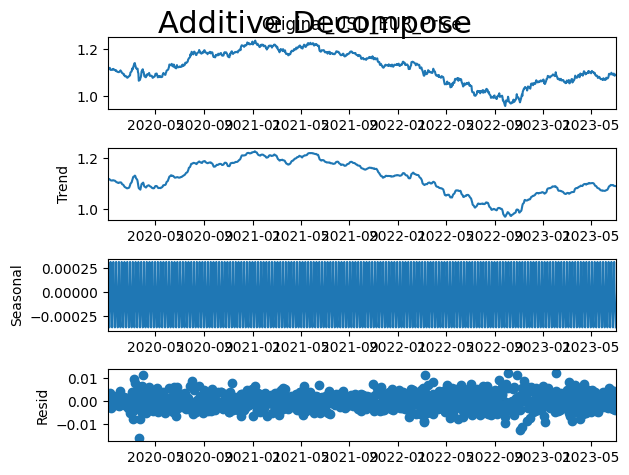

In [8]:
# Multiplicative Decomposition
result_add = seasonal_decompose(df_USD_EUR['Original_USD_EUR_Price'], model='additive', extrapolate_trend='freq')
result_add.plot().suptitle('Additive Decompose', fontsize=22)


In [9]:
from pmdarima.arima.utils import ndiffs
ndiffs(df_USD_EUR['Original_USD_EUR_Price_Pct_Change_diff'].dropna(), test='adf')  # 2



0

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_values(data, lags):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_acf(data.dropna(), lags=lags, ax=ax,zero=False)
    plt.title('ACF')
    plt.show()

def plot_pacf_values(data, lags):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_pacf(data.dropna(), lags=lags, ax=ax,zero=False,alpha=0.05)
    plt.title('PACF')
    plt.show()


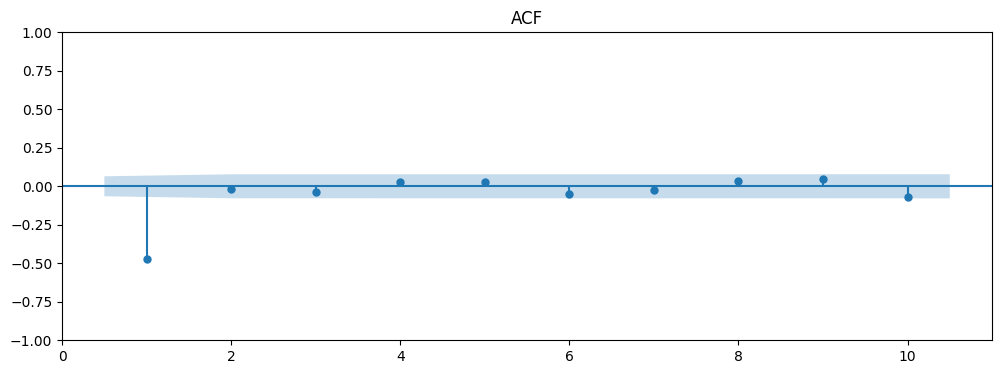

In [11]:
plot_acf_values(df_USD_EUR['Original_USD_EUR_Price_Pct_Change_diff'].dropna(), lags=10)


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


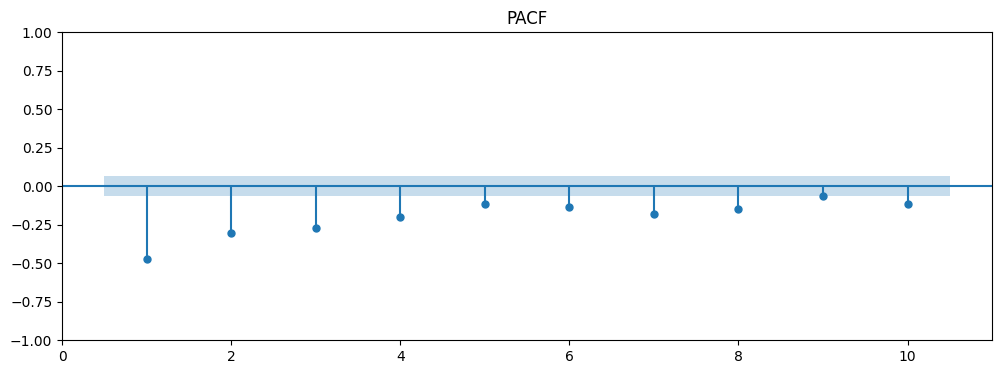

In [12]:
plot_pacf_values(df_USD_EUR['Original_USD_EUR_Price_Pct_Change_diff'].dropna(), lags=10)


In [13]:
# Define the start and end dates for train and test data
train_start_date = pd.to_datetime('2018-01-01')
train_end_date = pd.to_datetime('2022-12-31')
test_start_date = pd.to_datetime('2023-01-01')


In [14]:
train_data_currency = df_USD_EUR[(df_USD_EUR.index >= train_start_date) & (df_USD_EUR.index <= train_end_date)]
test_data_currency = df_USD_EUR[df_USD_EUR.index >= test_start_date]
train_data_currency.head(5)

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff
Date,,,
2020-01-02,1.122083,NaN,NaN
2020-01-03,1.117144,-0.004401,NaN
2020-01-06,1.116196,-0.000848,0.003553
2020-01-07,1.119799,0.003228,0.004077
2020-01-08,1.115474,-0.003863,-0.007091


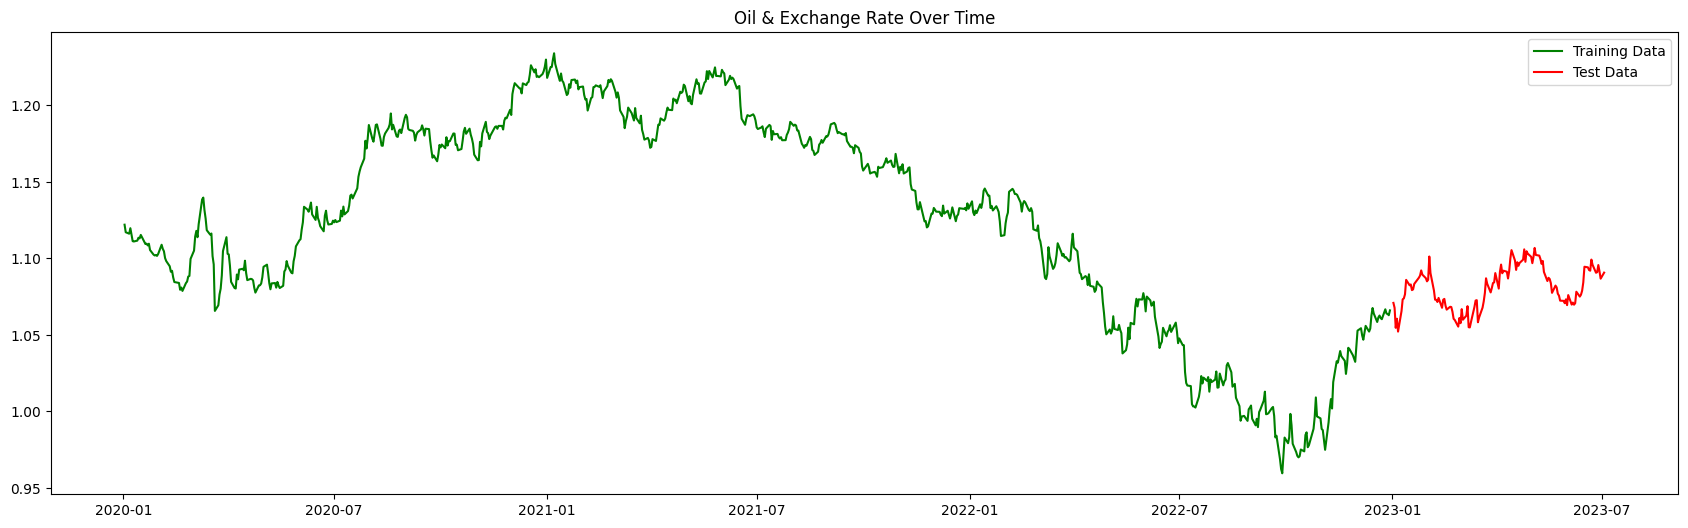

In [15]:
import matplotlib.pyplot as plt

# Plotting the entire data
plt.figure(figsize=(21, 6))

# Plotting the training data
plt.plot(train_data_currency.index, train_data_currency['Original_USD_EUR_Price'], color='green', label='Training Data')

# Plotting the test data
plt.plot(test_data_currency.index, test_data_currency['Original_USD_EUR_Price'], color='red', label='Test Data')

plt.title('Oil & Exchange Rate Over Time')
plt.legend()
plt.show()


In [16]:
print('Training data shape Currency: ', train_data_currency.shape)
print('Test data shape Currency: ', test_data_currency.shape)


Training data shape Currency:  (782, 3)
Test data shape Currency:  (131, 3)


In [17]:
from statsmodels.tsa.stattools import adfuller

def perform_adfuller(series):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(series)

    # Extract test statistics and p-value
    test_statistic = result[0]
    p_value = result[1]

    # Print the results
    print("Augmented Dickey-Fuller Test:")
    print(f"Test Statistic: {test_statistic}")
    print(f"P-value: {p_value}")

    # Check the p-value against a significance level (e.g., 0.05) to determine stationarity
    if p_value <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")



In [18]:
perform_adfuller(train_data_currency['Original_USD_EUR_Price_Pct_Change_diff'].dropna())

Augmented Dickey-Fuller Test:
Test Statistic: -12.734724565350213
P-value: 9.213254011977939e-24
The time series is stationary.


In [38]:
from pmdarima import auto_arima

def find_auto_arima(dataframe,column,exogcolumn=None):
  model = auto_arima(dataframe[column].dropna(),
                exog=exogcolumn,
                   start_p=1, start_q=1,
                   max_p=5, max_q=5, m=0,
                   seasonal=False,start_d=0,

                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
  return model

In [39]:
model = auto_arima(train_data_currency['Original_USD_EUR_Price_Pct_Change_diff'].dropna(),
                   start_p=1, start_q=1,
                      max_p=5, max_q=5, # maximum p and q
                      d=0,              # frequency of series
                      seasonal=False,   # No Seasonality
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5596.212, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-5781.774, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.73 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-5851.478, Time=0.41 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-5903.761, Time=0.23 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-5928.854, Time=0.32 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-5932.403, Time=0.62 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-5973.433, Time=1.23 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-5941.323, Time=0.29 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=-6001.825, Time=0.63 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-6055.052, Time=1.09 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-6061.452, Time=0.99 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.67 sec
 ARIMA(3,0,1)(0,0,0)[0]             :

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  780
Model:               SARIMAX(3, 0, 2)   Log Likelihood                3036.726
Date:                Wed, 05 Jul 2023   AIC                          -6061.452
Time:                        07:56:10   BIC                          -6033.496
Sample:                    01-06-2020   HQIC                         -6050.700
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8923      0.123     -7.227      0.000      -1.134      -0.650
ar.L2          0.0639      0.041      1.547      0.122      -0.017       0.145
ar.L3          0.0197      0.031      0.629      0.529      -0.042       0.081
ma.L1         -0.0365      0.122     -0.298      0.765      -0.276       0.203
ma.L2         -0.9346      0.118     -7.915      0.000      -1.166      -0.703
sigma2      2.385e-05   8.87e-07     26.878      0.000    2.21e-05    2.56e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               118.59
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.70   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
import warnings
warnings.filterwarnings("ignore")


In [41]:
from statsmodels.tsa.arima.model import ARIMA

def arima_model_fit(dataframe, p, d, q, exog=None):
    model = ARIMA(dataframe, order=(p,d,q), exog=exog)
    model_fit = model.fit()
    return model_fit

In [42]:
cur_model_fit=arima_model_fit(train_data_currency['Original_USD_EUR_Price_Pct_Change'].dropna(),1,0,2)
cur_model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:     Original_USD_EUR_Price_Pct_Change   No. Observations:                  781
Model:                                ARIMA(1, 0, 2)   Log Likelihood                3045.896
Date:                               Wed, 05 Jul 2023   AIC                          -6081.791
Time:                                       07:56:10   BIC                          -6058.488
Sample:                                   01-03-2020   HQIC                         -6072.829
                                        - 12-30-2022                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.548e-05      0.000     -0.291      0.771      -0.000       0.000
ar.L1         -0.6178      1.539     -0.401      0.688      -3.634       2.398
ma.L1          0.6919      1.537      0.450      0.653      -2.320       3.704
ma.L2          0.0551      0.103      0.535      0.593      -0.147       0.257
sigma2      2.396e-05   8.84e-07     27.095      0.000    2.22e-05    2.57e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               126.45
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

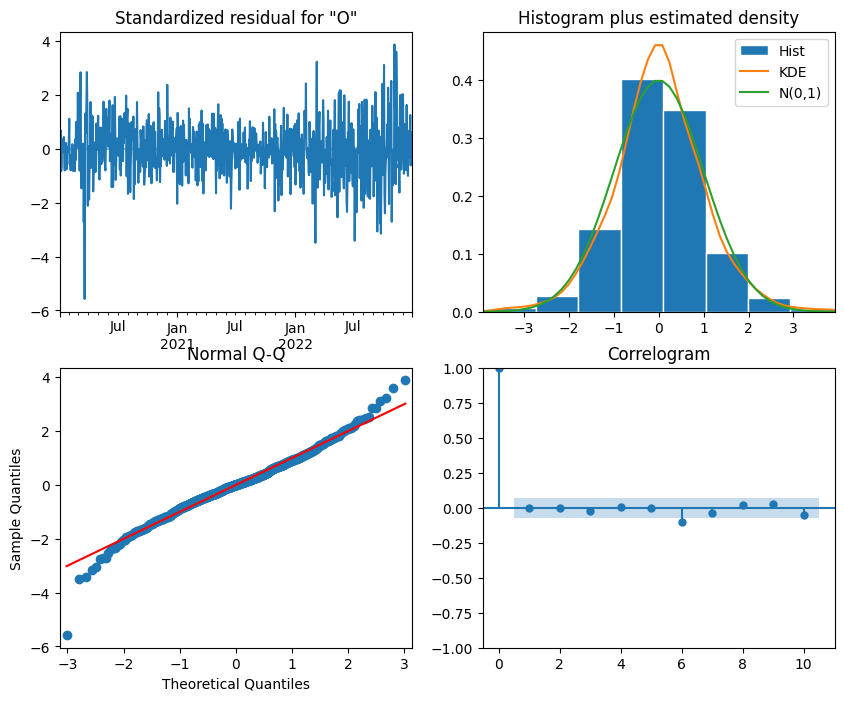

In [43]:
cur_model_fit.plot_diagnostics(figsize=(10,8))
plt.show()


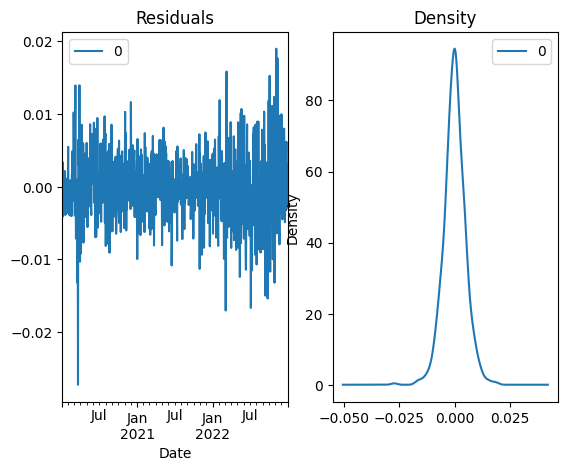

In [44]:
# Plot residual errors
residuals = pd.DataFrame(cur_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [45]:
# Get in-sample predictions
training_data_predictions = cur_model_fit.get_prediction(start=train_data_currency.dropna().index.min(),
                                                      end=train_data_currency.dropna().index.max(),
                                                      dynamic=False)

train_data_currency[['lower Cur predictions','Higher Cur predictions']] = training_data_predictions.conf_int()



# Create a new column for the predicted values
train_data_currency['Cur predictions'] = training_data_predictions.predicted_mean


train_data_currency

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff,lower Cur predictions,Higher Cur predictions,Cur predictions,reversediff,Original_USD_EUR_PricePredicted
Date,,,,,,,,
2020-01-03,1.117144,-0.004401,NaN,NaN,NaN,NaN,-0.004401,1.117144
2020-01-06,1.116196,-0.000848,0.003553,-0.009973,0.009216,-0.000378,-0.004780,1.111804
2020-01-07,1.119799,0.003228,0.004077,-0.009724,0.009466,-0.000129,-0.000977,1.110718
2020-01-08,1.115474,-0.003863,-0.007091,-0.009382,0.009807,0.000213,0.003441,1.114540
2020-01-09,1.111321,-0.003723,0.000140,-0.009933,0.009256,-0.000338,-0.004201,1.109857
...,...,...,...,...,...,...,...,...
2022-12-26,1.066780,0.006081,0.006717,-0.009687,0.009502,-0.000093,-0.000729,1.009400
2022-12-27,1.064022,-0.002586,-0.008666,-0.009194,0.009996,0.000401,0.006482,1.015943
2022-12-28,1.063717,-0.000287,0.002298,-0.009814,0.009376,-0.000219,-0.002805,1.013094


In [46]:
testing_data_forecast = cur_model_fit.get_forecast(steps=len(test_data_currency), alpha=0.05)


# Create a new dataframe to hold the forecast
test_data_currency[['lower Cur predictions','Higher Cur predictions']] = testing_data_forecast.conf_int()

# Create a new column for the forecasted values
test_data_currency['Cur predictions'] =  testing_data_forecast.predicted_mean


test_data_currency

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff,lower Cur predictions,Higher Cur predictions,Cur predictions,reversediff,Original_USD_EUR_PricePredicted
Date,,,,,,,,
2023-01-02,1.070973,0.004594,0.001631,-0.009455,0.009734,0.000139,0.003103,1.015000
2023-01-03,1.067771,-0.002990,-0.007584,-0.009630,0.009612,-0.000009,0.004585,1.019654
2023-01-04,1.054685,-0.012255,-0.009266,-0.009705,0.009537,-0.000084,-0.003074,1.016519
2023-01-05,1.060637,0.005642,0.017898,-0.009659,0.009584,-0.000038,-0.012293,1.004023
2023-01-06,1.052222,-0.007934,-0.013576,-0.009688,0.009555,-0.000066,0.005576,1.009622
...,...,...,...,...,...,...,...,...
2023-06-27,1.091048,0.000349,0.005115,-0.009677,0.009566,-0.000055,-0.004822,1.031210
2023-06-28,1.095722,0.004284,0.003935,-0.009677,0.009566,-0.000055,0.000294,1.031513
2023-06-29,1.091584,-0.003777,-0.008061,-0.009677,0.009566,-0.000055,0.004229,1.035875


In [47]:
def Transform_OriginalValue(df,PredictedValue,Number_pct_change,original):
    initial_value = df[original][0]
    df['reversediff']=df[Number_pct_change].shift(1) + df[PredictedValue]
    initial_value = df[original][0]
    df.dropna(subset=[Number_pct_change], inplace=True)
    first_date = df.index[0]
    df.loc[df.index == first_date, 'reversediff'] = df.loc[df.index == first_date, Number_pct_change]
    df[original+'Predicted'] = (df['reversediff'] + 1).cumprod() * initial_value
    df = df.drop('reversediff', axis=1)



In [48]:
df_currency = pd.concat([train_data_currency, test_data_currency])
df_currency.head(5)

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff,lower Cur predictions,Higher Cur predictions,Cur predictions,reversediff,Original_USD_EUR_PricePredicted
Date,,,,,,,,
2020-01-03,1.117144,-0.004401,NaN,NaN,NaN,NaN,-0.004401,1.117144
2020-01-06,1.116196,-0.000848,0.003553,-0.009973,0.009216,-0.000378,-0.004780,1.111804
2020-01-07,1.119799,0.003228,0.004077,-0.009724,0.009466,-0.000129,-0.000977,1.110718
2020-01-08,1.115474,-0.003863,-0.007091,-0.009382,0.009807,0.000213,0.003441,1.114540
2020-01-09,1.111321,-0.003723,0.000140,-0.009933,0.009256,-0.000338,-0.004201,1.109857


In [49]:
Transform_OriginalValue(df_currency,'Cur predictions','Original_USD_EUR_Price_Pct_Change','Original_USD_EUR_Price')

In [50]:
train_data_currency=df_currency[df_currency.index < test_start_date]
train_data_currency.head(5)

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff,lower Cur predictions,Higher Cur predictions,Cur predictions,reversediff,Original_USD_EUR_PricePredicted
Date,,,,,,,,
2020-01-03,1.117144,-0.004401,NaN,NaN,NaN,NaN,-0.004401,1.112227
2020-01-06,1.116196,-0.000848,0.003553,-0.009973,0.009216,-0.000378,-0.004780,1.106910
2020-01-07,1.119799,0.003228,0.004077,-0.009724,0.009466,-0.000129,-0.000977,1.105829
2020-01-08,1.115474,-0.003863,-0.007091,-0.009382,0.009807,0.000213,0.003441,1.109634
2020-01-09,1.111321,-0.003723,0.000140,-0.009933,0.009256,-0.000338,-0.004201,1.104972


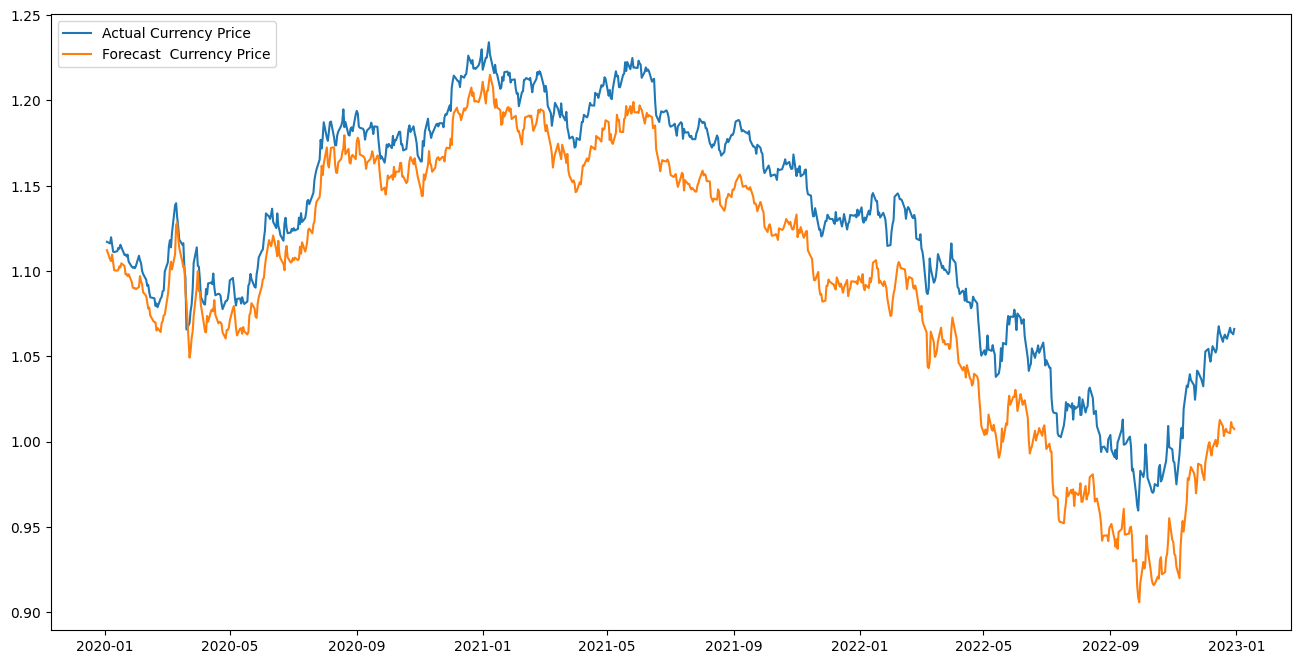

In [51]:
plt.figure(figsize=(16,8))
plt.plot(train_data_currency['Original_USD_EUR_Price'],label="Actual Currency Price")
plt.plot(train_data_currency['Original_USD_EUR_PricePredicted'],label="Forecast  Currency Price")
plt.legend(loc="upper left")

In [52]:
test_data_currency=df_currency[df_currency.index >= test_start_date]
test_data_currency.head(5)

,Original_USD_EUR_Price,Original_USD_EUR_Price_Pct_Change,Original_USD_EUR_Price_Pct_Change_diff,lower Cur predictions,Higher Cur predictions,Cur predictions,reversediff,Original_USD_EUR_PricePredicted
Date,,,,,,,,
2023-01-02,1.070973,0.004594,0.001631,-0.009455,0.009734,0.000139,0.003103,1.010532
2023-01-03,1.067771,-0.002990,-0.007584,-0.009630,0.009612,-0.000009,0.004585,1.015166
2023-01-04,1.054685,-0.012255,-0.009266,-0.009705,0.009537,-0.000084,-0.003074,1.012045
2023-01-05,1.060637,0.005642,0.017898,-0.009659,0.009584,-0.000038,-0.012293,0.999604
2023-01-06,1.052222,-0.007934,-0.013576,-0.009688,0.009555,-0.000066,0.005576,1.005178


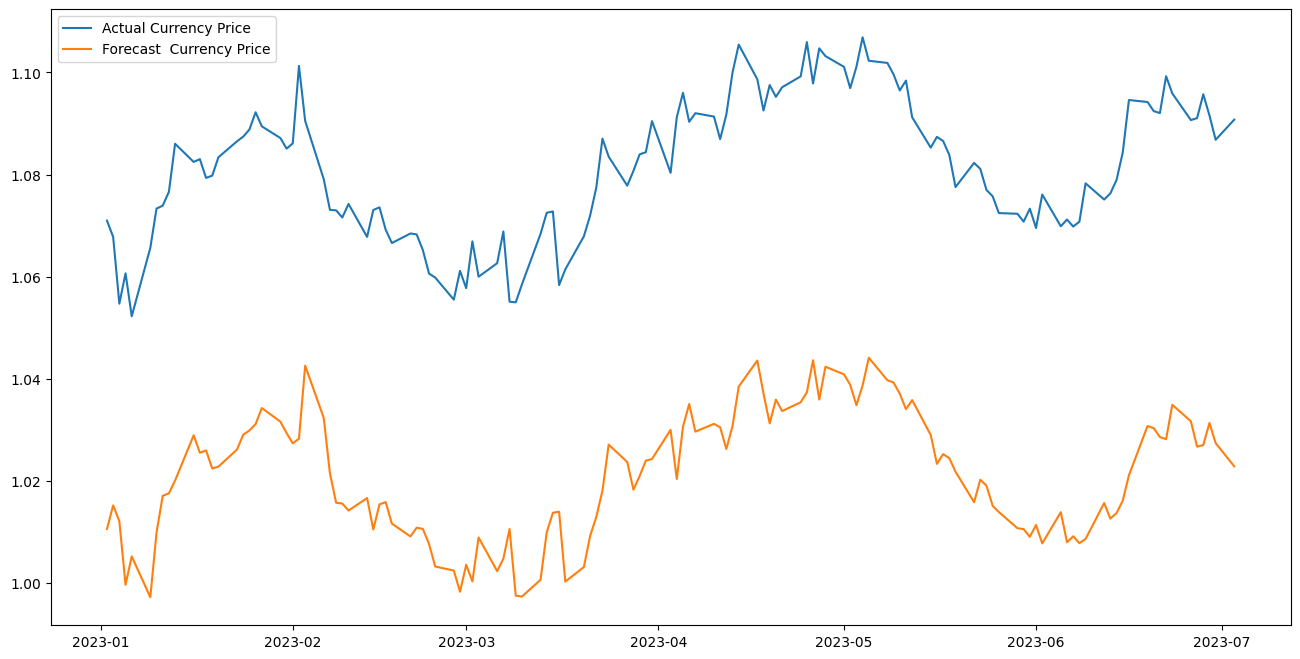

In [53]:
plt.figure(figsize=(16,8))
plt.plot(test_data_currency['Original_USD_EUR_Price'],label="Actual Currency Price")
plt.plot(test_data_currency['Original_USD_EUR_PricePredicted'],label="Forecast  Currency Price")
plt.legend(loc="upper left")

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {"Mean Absolute Error": mae, "Mean Squared Error": mse, "Root Mean Squared Error": rmse, "Mean Absolute Percentage Error": mape}



In [55]:
metrics = calculate_metrics(test_data_currency['Original_USD_EUR_Price'], test_data_currency['Original_USD_EUR_PricePredicted'])
metrics

{'Mean Absolute Error': 0.06017857588121261,
 'Mean Squared Error': 0.003655893890829428,
 'Root Mean Squared Error': 0.06046398838010463,
 'Mean Absolute Percentage Error': 5.563598080320503}